# Bike Sharing Data Set Exploration

## by Stefan Schonauer

## Introduction

This project is part of Udacity's Data Analyst Nanodegree (DAND) and focusses on exploratory and explainatory data analysis. The data is originally from bike data from the San Francisco Bay Area in Feburary 2019.

## Preliminary Wrangling

For a required wrangling I follow the data wrangling process containing gathering - assessing and cleaning. I will pass the first two steps in this section.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os

%matplotlib inline

In [2]:
# Check package versions

# pd.show_versions(as_json = False)

### Gather

In [3]:
# Import data as bike_raw

bike_raw = pd.read_csv('201902-fordgobike-tripdata.csv')

### Assess

#### Visual Assessment

In [4]:
# Display dataframe

bike_raw.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


#### Programmatic Assessment

In [5]:
# Get dimensions of the data

print('Number of rows: {rows}; Number of columns : {columns}.'.format(rows = bike_raw.shape[0], columns = bike_raw.shape[1]))

Number of rows: 183412; Number of columns : 16.


In [6]:
# Show non-null values

bike_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [7]:
# Show class of objects

for element in range(len(bike_raw.columns)):

    print('Class of column [{column}]: {type}'.format(column = bike_raw.columns[element], type = type(bike_raw.loc[0][element])))

Class of column [duration_sec]: <class 'numpy.int64'>
Class of column [start_time]: <class 'str'>
Class of column [end_time]: <class 'str'>
Class of column [start_station_id]: <class 'numpy.float64'>
Class of column [start_station_name]: <class 'str'>
Class of column [start_station_latitude]: <class 'numpy.float64'>
Class of column [start_station_longitude]: <class 'numpy.float64'>
Class of column [end_station_id]: <class 'numpy.float64'>
Class of column [end_station_name]: <class 'str'>
Class of column [end_station_latitude]: <class 'numpy.float64'>
Class of column [end_station_longitude]: <class 'numpy.float64'>
Class of column [bike_id]: <class 'numpy.int64'>
Class of column [user_type]: <class 'str'>
Class of column [member_birth_year]: <class 'numpy.float64'>
Class of column [member_gender]: <class 'str'>
Class of column [bike_share_for_all_trip]: <class 'str'>


In [8]:
# Get statistical information about quantitative data

bike_raw.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [9]:
# null values

bike_raw.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [10]:
# duplicated rows

bike_raw[bike_raw.duplicated()].count()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [11]:
# range of start end end time

print('Earliest start: {start}; Latest start: {end}.'.format(start = bike_raw.start_time.min(), end = bike_raw.start_time.max()))

print('Earliest end: {start}; Latest end: {end}.'.format(start = bike_raw.end_time.min(), end = bike_raw.end_time.max()))

Earliest start: 2019-02-01 00:00:20.6360; Latest start: 2019-02-28 23:59:18.5480.
Earliest end: 2019-02-01 00:04:52.0580; Latest end: 2019-03-01 08:01:55.9750.


In [12]:
# Total number of station and maximum number of station

print('Total number of start station: {start}; total number of end station: {end}.'.format(start = bike_raw.start_station_id.nunique(), end = bike_raw.end_station_id.nunique()))

print('Maximum number of start station: {start}; Maximum number of end station: {end}.'.format(start = bike_raw.start_station_id.max(), end = bike_raw.end_station_id.max()))

Total number of start station: 329; total number of end station: 329.
Maximum number of start station: 398.0; Maximum number of end station: 398.0.


In [13]:
# values in user type

bike_raw.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [14]:
# values in member gender

bike_raw.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [15]:
# values in bike share for all trip 

bike_raw.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

#### Assess Summary

- shape 183,412 rows x 16 columns

##### Tidyness

- no tidyness issues

##### Quality

- `duration_sec` int should be float
- `start_time` `end_time` str should be datetype
- `start_station_id` `end_station_id` float should be str, 197 null values, 329 stations
- `start_station_name` `end_station_name` 197 null values
- `start_station_latitude` `start_station_longitude` `end_station_latitude` `end_station_longitude`
- `bike_id` int should be str
- `member_birth_year` 8265 null values, unusual value 1878, should be str
- `member_gender` 8265 null values, values 'male', 'female', 'other'

### What is the structure of your dataset?

There are 183,412 rows and 16 columns in the data set. 

- `duration_sec` duration of the trip in [sec], continous data
- `start_time` `end_time` start and end time of the trip, start values in Feb 2019, end values in Feb and Mar 2019, continous data
- `start_station_id` `end_station_id` id of the station, categorical data
- `start_station_name` `end_station_name` name of the station, categorical data
- `start_station_latitude` `start_station_longitude` `end_station_latitude` `end_station_longitude` latitude and logitude of station, continous data
- `bike_id` id of the bike, categorical data
- `user_type` user type of the programm, nominal categorical data, values 'subscriber', 'custumer'
- `member_birth_year` birthyear of the member, nominal categorical data
- `member_gender` sex of the member, nominal categorical data, values 'male', 'female', 'other'
- `bike_share_for_all_trip` extended programm, nominal categorical data, values 'yes', 'no'

- there are 7 features with quantitative and 9 features with qualitative data.

### What is/are the main feature(s) of interest in your dataset?

I am interested in rides and related departure stations.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect, that the following features support my investigation

- ride duration time, daytime, day of the week,
- geographical coordinates,
- user types.

## Univariate Exploration

After gathering and assessing my data in the previous step I am able to clean and investigate the data accordingly to the features of interest.

### Clean

#### `start_station_id` and `end_station_id` regarding geographical coordinates

My main features of interest are rides and related departures from the stations. Deleting 197 rows with null values of my main features will lose information, so I try to find a pattern between geographical coordinates and stations and try to impute or correct the cells.

In [16]:
# logitude and latitude of null values in start stations

bike_raw[bike_raw.start_station_id.isnull()][['start_station_longitude', 'start_station_latitude']].describe()

,start_station_longitude,start_station_latitude
count,197.000000,197.000000
mean,-121.943401,37.406599
std,0.012376,0.007634
min,-121.980000,37.380000
25%,-121.950000,37.400000
50%,-121.940000,37.410000
75%,-121.930000,37.410000
max,-121.920000,37.420000


In [17]:
# logitude and latitude of null values in end stations

bike_raw[bike_raw.end_station_id.isnull()][['end_station_longitude', 'end_station_latitude']].describe()

,end_station_longitude,end_station_latitude
count,197.000000,197.000000
mean,-121.943096,37.406091
std,0.012859,0.008047
min,-121.980000,37.380000
25%,-121.950000,37.400000
50%,-121.940000,37.410000
75%,-121.930000,37.410000
max,-121.920000,37.430000


In [18]:
# comparison with other start station

bike_raw[bike_raw.start_station_id == '3'][['start_station_longitude', 'start_station_latitude']].describe()

,start_station_longitude,start_station_latitude
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


Geographical coordinates of stations of a random station are really constant with a standard deviation of almost 0. Seems that stations with missing ID's are from multiple stations, because the standard deviation is around 0.01 and much higher than the assigned stations. I decide to remove the rows.

In [19]:
# drop null value stations

bike_raw_na = bike_raw.index[bike_raw.end_station_id.isnull()]

bike_raw.drop(bike_raw_na, inplace = True)

#### Change data types

In [20]:
# duration_sec to float

bike_raw.duration_sec = bike_raw.duration_sec.astype('float')

# start and end time to datetime

bike_raw.start_time = pd.to_datetime(bike_raw.start_time, yearfirst = True, errors='coerce')
bike_raw.end_time = pd.to_datetime(bike_raw.end_time, yearfirst = True, errors='coerce')

# station id to str

bike_raw.start_station_id = bike_raw.start_station_id.astype('int')
bike_raw.start_station_id = bike_raw.start_station_id.astype('str')
bike_raw.end_station_id = bike_raw.end_station_id.astype('int')
bike_raw.end_station_id = bike_raw.end_station_id.astype('str')

# bike id to str

bike_raw.bike_id = bike_raw.bike_id.astype('str')

#### Correct unusual value und null values in `member_birth_year`

Column `member_birth_year` is no supportive feature. Deleting more than 8,000 rows because of a missing birth year will decrease accuracy. I set the unusual value and to null and remain the null values.

In [21]:
# detect unusual values

bike_raw.member_birth_year.unique()

array([1984.,   nan, 1972., 1989., 1974., 1959., 1983., 1988., 1992.,
       1996., 1993., 1990., 1981., 1975., 1978., 1991., 1997., 1986.,
       2000., 1982., 1995., 1980., 1973., 1985., 1971., 1979., 1967.,
       1998., 1994., 1977., 1999., 1987., 1969., 1963., 1976., 1964.,
       1965., 1961., 1968., 1966., 1962., 1954., 1958., 1960., 1970.,
       1956., 1957., 1945., 1900., 1952., 1948., 1951., 1941., 1950.,
       1949., 1953., 1955., 1946., 1947., 1931., 1943., 1942., 1920.,
       1933., 2001., 1878., 1901., 1944., 1928., 1934., 1939., 1930.,
       1902., 1910., 1938., 1927.])

I remove all values lower than birth year 1920, because I think there should be no customer older than 101 years.

In [22]:
# Correct unusual value und null values

bike_raw.member_birth_year.replace(1878, 0, inplace = True)
bike_raw.member_birth_year.replace(1900, 0, inplace = True)
bike_raw.member_birth_year.replace(1901, 0, inplace = True)
bike_raw.member_birth_year.replace(1902, 0, inplace = True)
bike_raw.member_birth_year.replace(1910, 0, inplace = True)
bike_raw.member_birth_year.replace(0, np.NaN, inplace = True)

# birth_year to int

bike_raw.member_birth_year = bike_raw.member_birth_year.fillna(0).astype('int')

# birth_year to str

bike_raw.member_birth_year = bike_raw.member_birth_year.astype('str')

#### Reset Index

Reset index after droping rows.

In [23]:
bike_raw.reset_index(drop = True, inplace = True)

#### Test

Let us test the success of the data type change.

In [24]:
bike_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183215 entries, 0 to 183214
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183215 non-null  float64       
 1   start_time               183215 non-null  datetime64[ns]
 2   end_time                 183215 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183215 non-null  float64       
 6   start_station_longitude  183215 non-null  float64       
 7   end_station_id           183215 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183215 non-null  float64       
 10  end_station_longitude    183215 non-null  float64       
 11  bike_id                  183215 non-null  object        
 12  user_type       

### Store

In [25]:
# store the cleaned dataframe as bike

bike = bike_raw.copy()

### Investigate

#### Single and multiple trips

Create a column `station_multi` to distinguish trips which start and end on the same (singe trips) or on different stations (multi trips).

In [26]:
# create column 'station_multi' 0 -> start_station == end_station; 1 -> start_station != end_station

bike['station_multi'] = np.where(bike.start_station_id == bike.end_station_id, 0, 1)

In [27]:
# percentage of roundtrips

bike[bike.station_multi == 1].shape[0] / bike.shape[0]

0.9791392626149605

In [28]:
bike[bike.station_multi == 0].shape[0] / bike.shape[0]

0.020860737385039435

There is a low percentage (2%) of trips which are single trips in comparison to trips with multiple stations (98%). I decide to focus on the whole data set and not to plit it acordingly single and multiple station trips.

#### Time related variables

Create columns which are related to time.

In [29]:
# create columns for duration in [min] and [h]

bike['duration_min'] = bike.duration_sec / 60
bike['duration_hour'] = bike.duration_min / 60

Let us plot frequency of duration in a histogram. I start with a global view with a focus on hours and continue with a focus on minutes. 

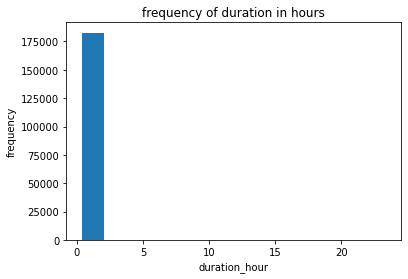

In [30]:
# histogram of frequency of duration in hours

plt.title('frequency of duration in hours')
plt.xlabel('duration_hour')
plt.ylabel('frequency')
plt.hist(data = bike, x = 'duration_hour', rwidth = 0.7);

The mass of rides occur within a few hours. A log scale gives better insights.

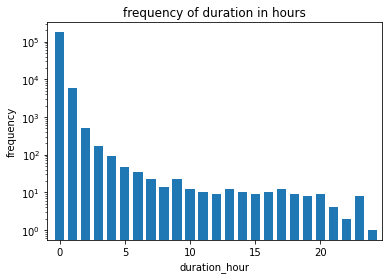

In [31]:
# histogram of frequency of duration in hours with logscales

# set bins

bins = np.arange(- 0.5, int(bike.duration_hour.max() + 1) + 1.5, 1)

# drop

plt.title('frequency of duration in hours')
plt.xlabel('duration_hour')
plt.ylabel('frequency')
plt.xlim([bike.duration_hour.min() - 1, bike.duration_hour.max() + 1])
plt.hist(data = bike, x = 'duration_hour', bins = bins, rwidth = 0.7, log = True);

The log scale gives better insights of the distribution. Maybe I get a better insight when focussing on minutes.

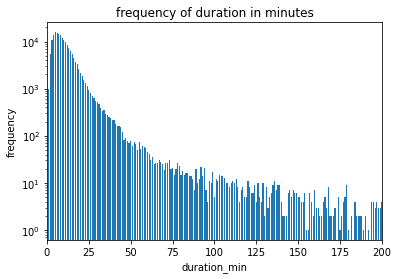

In [32]:
# histogram of frequency of duration in minutes with logscales

# set bins

bins = np.arange(- 0.5, bike.duration_min.max() + 1.5, 1)

# drop

plt.title('frequency of duration in minutes')
plt.xlabel('duration_min')
plt.ylabel('frequency')
plt.xlim([0, 200])
plt.hist(data = bike, x = 'duration_min', bins = bins, rwidth = 0.7, log = True);

There is a maximum of rides within the first 20 minutes. Seems that the bike system is mostly used by short time renters. Let us investigate possible outliers.

In [33]:
# define outliers based on "1.5 IQR rule"

quantile_25 = np.quantile(bike['duration_sec'], 0.25)
quantile_75 = np.quantile(bike['duration_sec'], 0.75)

iqr = quantile_75 - quantile_25

lower = quantile_25 - 1.5 * iqr
upper = quantile_75 + 1.5 * iqr

print(lower)
print(upper)

-381.5
1502.5


In [34]:
# relative part of outliers above upper threshold

bike[bike.duration_sec > upper].shape[0] / bike.shape[0]

0.05511557459814972

There are more than 5% of duration values above the "1.5 IQR rule". A drop will increase inaccuracy. Values of a longer durations appear as correct and realistic. I decide to keep them in the dataframe and create a reduced datafram for further investigation.

In [35]:
# create reduced dataframe 'bike_red'

bike_red = bike[bike.duration_sec < upper]

Now I plot the the reduced dataframe.

In [36]:
# create function 'myHistPlot' to avoid repetitive code

def myHistPlot(df, xVar, bins = None):
    
    # This function plots a matplotlib histplot
    # input: df = dataframe, xVar = x-variable as series of df, bins = number of bin (optional)
    # output: matplotlib histplot
    
    # plot
    
    df[xVar].hist(bins = bins,
                  rwidth = 0.7,
                 figsize = [20, 5],
                 grid = False)
    
    # title
    
    plt.title(f'Distribution of {xVar}'.title(),
             fontsize = 14,
             weight = 'bold')
    
    # x axis
    
    plt.xlabel(xVar.title(),
              fontsize = 10,
              weight = 'bold')
    
    # y axis
    
    plt.ylabel('Frequency'.title(),
              fontsize = 10,
              weight = 'bold')

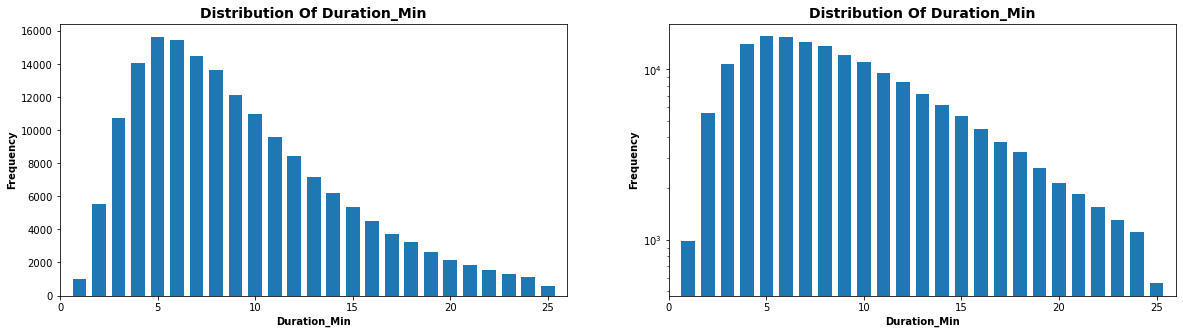

In [37]:
# histogram of frequency of duration in minutes of reduced dataframe

# set bins

bins = np.arange(- 0.5, bike_red.duration_min.max() + 1.5, 1)

# subplot 1

plt.subplot(1, 2, 1) 
myHistPlot(bike_red, 'duration_min', bins = bins)
plt.xlim([0, 26])

# subplot 2

plt.subplot(1, 2, 2) 
myHistPlot(bike_red, 'duration_min', bins = bins)
plt.xlim([0, 26])
plt.yscale('log');

Let us focus on frequencies over the different time periods.

In [38]:
# day of week (Monday=0, Sunday=6)

bike['start_time_day_of_week'] = bike.start_time.dt.dayofweek
bike['start_time_day_of_week_name'] = bike.start_time.dt.day_name()

# hour of day

bike['start_time_day'] = bike.start_time.dt.day
bike['start_time_hour'] = bike.start_time.dt.hour

Let us plot the dimensions 'day of month', 'day of week' and 'hour of day' in histograms.

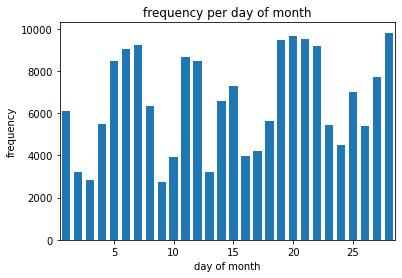

In [39]:
# histogram of frequency per day of month

# set bins

bins = np.arange(0.5, bike.start_time_day.max() + 1.5, 1)

# plot

plt.title('frequency per day of month')
plt.xlabel('day of month')
plt.ylabel('frequency')
plt.xlim([bike.start_time_day.min() - 0.5, bike.start_time_day.max() + 0.5])
plt.hist(data = bike, x = 'start_time_day', bins = bins, rwidth = 0.7);

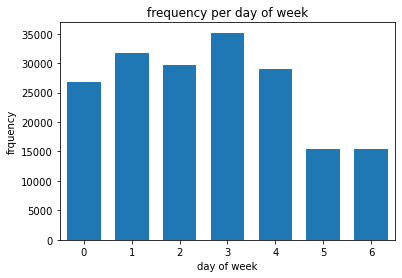

In [40]:
# histogram of frequency per day of week (Monday=0, Sunday=6)

# set bins

bins = np.arange(- 0.5, bike.start_time_day_of_week.max() + 1.5, 1)

plt.xlabel('day of week')
plt.ylabel('frquency')
plt.title('frequency per day of week')
plt.xlim([bike.start_time_day_of_week.min() - 0.5, bike.start_time_day_of_week.max() + 0.5])
plt.hist(data = bike, x = 'start_time_day_of_week', bins = bins, rwidth = 0.7);

Variable 'day of month' shows a saisonal or weekly period. This distribution is comparable to the 'day of week' variable, so I focus only on the 'day of week' variable. 

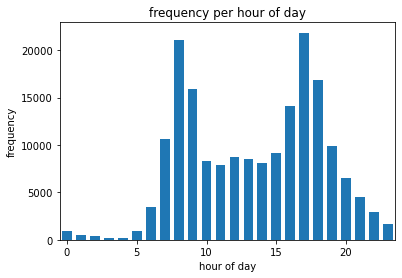

In [41]:
# histogram of frequency per hour of day

# set bins

bins = np.arange(- 0.5, bike.start_time_hour.max() + 1.5, 1)

# plot

plt.xlabel('hour of day')
plt.ylabel('frequency')
plt.title('frequency per hour of day')
plt.xlim([bike.start_time_hour.min() - 0.5, bike.start_time_hour.max() + 0.5])
plt.hist(data = bike, x = 'start_time_hour', bins = bins, rwidth = 0.7);

The plot of 'day of month' and 'day of week' show that there is a higher frequency during week than on weekend. The 'hour of day' plot shows higher frequencies in the morning and in the afternoon. Both could be related to commuting and working.

#### User type

Let us have a look on user types.

In [42]:
# create temp data frame

df_user_type = bike.user_type.value_counts().reset_index()

df_user_type.rename(columns={"index": "user_type", "user_type": "abs"}, inplace = True)
df_user_type['rel'] = df_user_type['abs'] / bike.shape[0]

df_user_type

,user_type,abs,rel
0,Subscriber,163414,0.891925
1,Customer,19801,0.108075


Let us plot this categorical data in a bar chart.

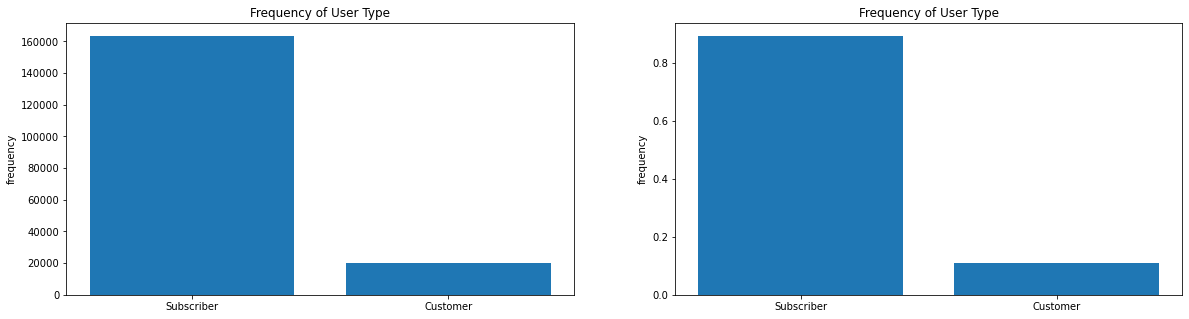

In [43]:
plt.figure(figsize = [20, 5]) 

# subplot 2

plt.subplot(1, 2, 1) 
plt.title('Frequency of User Type')
plt.ylabel('frequency')
plt.bar(df_user_type['user_type'], df_user_type['abs'])

# subplot 2

plt.subplot(1, 2, 2)
plt.title('Frequency of User Type')
plt.ylabel('frequency')
plt.bar(df_user_type['user_type'], df_user_type['rel']);

Subscibers have a higher proportion in the distribution (89%) than customers (11%). 

#### Departures on Stations

Let us focus on departures on stations.

In [44]:
# create temp data frame df_bike_temp

df_bike_temp = bike.groupby(['start_station_name', 'start_station_id'])['station_multi'].count().reset_index().sort_values(by = 'station_multi', ascending = False)

# df_bike_temp.head(20)

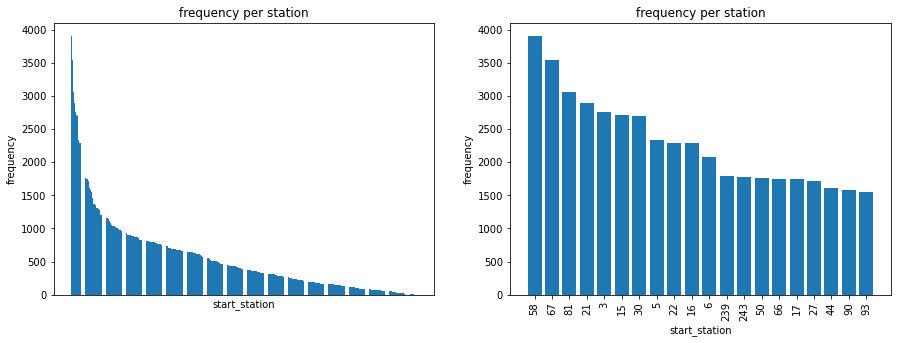

In [45]:
# bar chart of frequency per station

# set figure

plt.figure(figsize = [15, 5]) 

# subplot 1

plt.subplot(1, 2, 1) 
x = df_bike_temp.start_station_name
y = df_bike_temp.station_multi

plt.title('frequency per station')
plt.xlabel('start_station')
plt.ylabel('frequency')
plt.xticks([])
plt.bar(x, y)

# subplot 1

plt.subplot(1, 2, 2)
x = df_bike_temp.start_station_id[0:20]
y = df_bike_temp.station_multi[0:20]

plt.title('frequency per station')
plt.xlabel('start_station')
plt.ylabel('frequency')
plt.xticks(rotation = 90)
plt.bar(x, y);

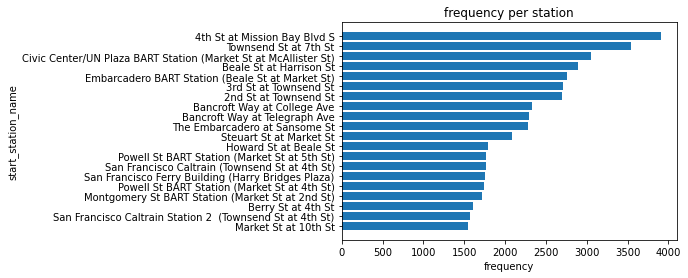

In [46]:
# horiontal bar chart of frequency per station 

x = df_bike_temp.station_multi[0:20].sort_values()
y = df_bike_temp.start_station_name[0:20]

plt.title('frequency per station')
plt.xlabel('frequency')
plt.ylabel('start_station_name')
plt.barh(y, x);

There is a high variation in the frequency per station. There are 20 stations which have more than 1,500 depatures over the period.

#### Geographical coordinates

Let us have a look on geographical coordinates longitude and latitude.

In [47]:
df_bike_geo_temp = bike.groupby(['start_station_name', 'start_station_id', 'start_station_longitude', 'start_station_latitude'])['station_multi'].count().reset_index()

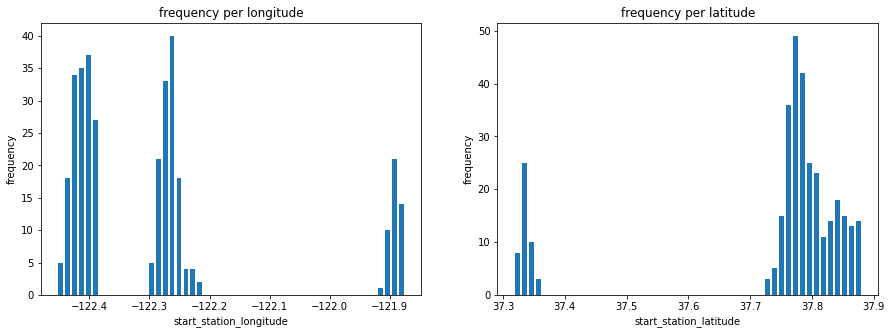

In [48]:
# frequency of geographical coordinates

# set bins

bins = 50

# set figures

plt.figure(figsize = [15, 5]) 

#subplot 1

plt.subplot(1, 2, 1)
plt.xlabel('start_station_longitude')
plt.ylabel('frequency')
plt.title('frequency per longitude')
plt.hist(data = df_bike_geo_temp, x = 'start_station_longitude', bins = bins, rwidth = 0.7)

# subplot 2

plt.subplot(1, 2, 2)
plt.xlabel('start_station_latitude')
plt.ylabel('frequency')
plt.title('frequency per latitude')
plt.hist(data = df_bike_geo_temp, x = 'start_station_latitude', bins = bins, rwidth = 0.7);

Distribution of geographical coordinates of the stations is grouped. Seems that there are around two or three groups or clusters.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Every row in the dataset decribes one ride. My variable of interest is best shown in the frequency of departure stations. Rides are vey unusual dirstibuted over the stations. There were no unusual points and I did not do any transformation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There were some data quality issues. I changed several data types to treat them as categorical data oder changed data types. I dropped stations with no station name and id, because I was not able to impute the data accordingly. There were unusual points in the birth year variable (people older than 100 years). I decided to change them as null values, because birth year is no feature of interest in my investigation. There are values in the duration variable which appear as outliers. I decided to keep them and created a reduced dataframe for further investigation on duration. Furthermore, I created new variables like 'day of week', 'hour of day' and 'single' or 'multiple station trip'.

## Bivariate Exploration

In this section I investigate the relationships between my chosen features.

#### Geographival Coordinates

At first I try to confirm my suspicion on the geographical clusters by plotting logitude and latitude using a scatter plot.

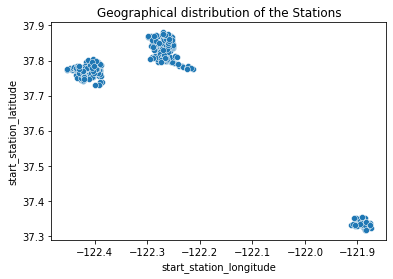

In [49]:
# Scatter plot of geographical coordinates

plt.title('Geographical distribution of the Stations')
sb.scatterplot(data = df_bike_geo_temp, x = 'start_station_longitude', y = 'start_station_latitude');

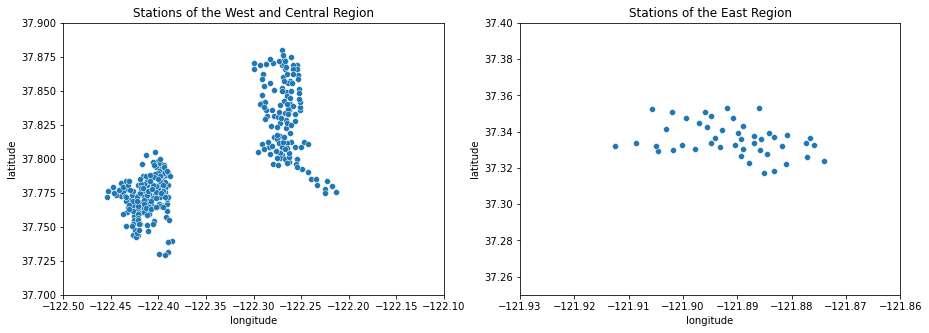

In [50]:
# # Scatter plot of geographical coordinates with subplots

# set figure

plt.figure(figsize = [15, 5]) 

# subplot 1

plt.subplot(1, 2, 1)
plt.xlim(-122.5, -122.1)
plt.ylim(37.7, 37.9)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Stations of the West and Central Region')
sb.scatterplot(data = df_bike_geo_temp, x = 'start_station_longitude', y = 'start_station_latitude');

# subplot 2

plt.subplot(1, 2, 2)
plt.xlim(-121.93, -121.86)
plt.ylim(37.25, 37.4)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Stations of the East Region')
sb.scatterplot(data = df_bike_geo_temp, x = 'start_station_longitude', y = 'start_station_latitude');

There are three major groups of stations in the data set. I define them as 'West', 'Central' and 'East'. I create a new column 'region' in the data frame to consider region as additional categorical data in the next investigation.

In [51]:
# Create a column 'region'

conditions = [(bike.start_station_longitude <= -122.35),
              (bike.start_station_longitude > -122.35) & (bike.start_station_longitude <= -122.1),
              (bike.start_station_longitude > -122.1)]
            
values = ['West', 'Central', 'East']

bike['region'] = np.select(conditions, values)

In [52]:
# create reduced dataframe 'bike_red' based on bike with column 'region'

bike_red = bike[bike.duration_sec < upper]

#### Time related variables

After that I investigate relationships between time related variables and my categorical data 'user type' and 'region'. First, I concentrate on duration and the comparison of the reduced and the full bike dataframe.

In [53]:
# basic diagram settings

base_color = sb.color_palette()[0]

region_order = ['West', 'Central', 'East']
user_type_order = ['Customer', 'Subscriber']

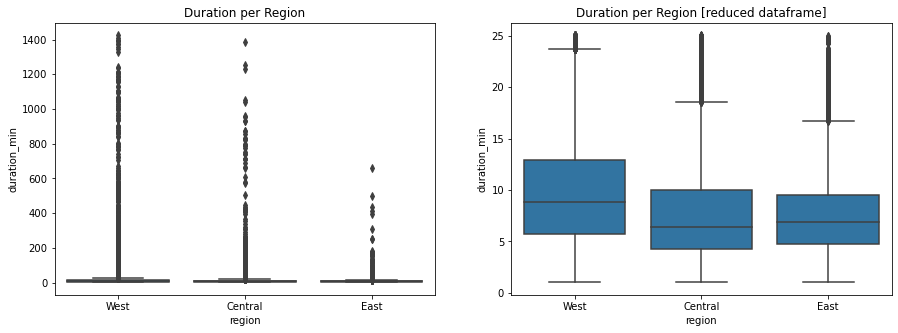

In [54]:
# Duration per Region [boxplot]

# set figure

plt.figure(figsize = [15, 5]) 

# subplot 1

plt.subplot(1, 2, 1)
plt.xlabel('region')
plt.title('Duration per Region')
sb.boxplot(data=bike, x='region', y='duration_min', order = region_order, color = base_color)

# subplot 2

plt.subplot(1, 2, 2)
plt.xlabel('region')
plt.title('Duration per Region [reduced dataframe]')
sb.boxplot(data=bike_red, x='region', y='duration_min', order = region_order, color = base_color);

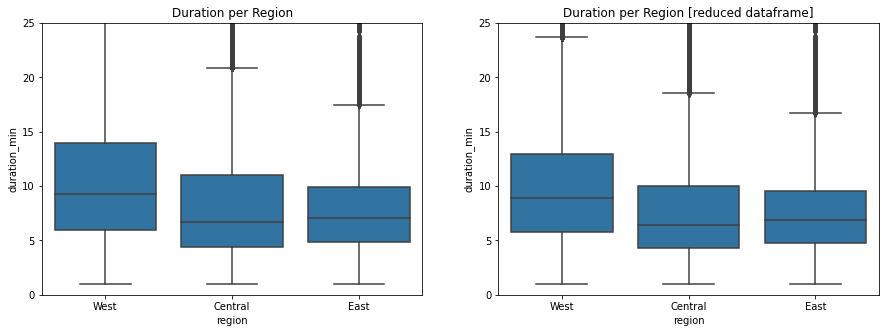

In [55]:
# Duration per Region [boxplot, adjusted axes]

plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.ylim([0, 25])
plt.xlabel('region')
plt.title('Duration per Region')
sb.boxplot(data=bike, x='region', y='duration_min', order = region_order, color = base_color)#

plt.subplot(1, 2, 2)
plt.ylim([0, 25])
plt.xlabel('region')
plt.title('Duration per Region [reduced dataframe]')
sb.boxplot(data=bike_red, x='region', y='duration_min', order = region_order, color = base_color);

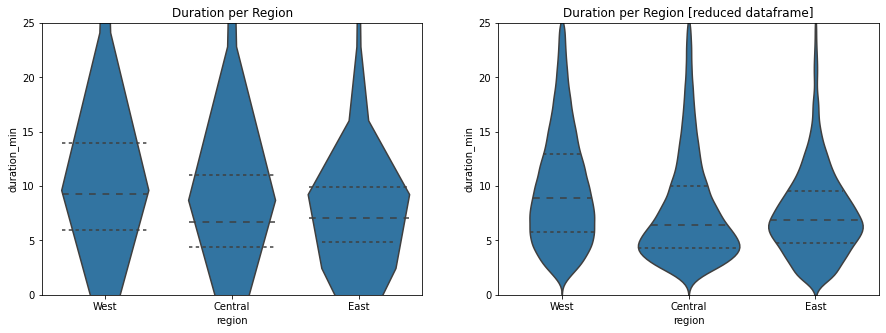

In [56]:
# Duration per Region [violinplot, adjusted axes]

plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.ylim([0, 25])
plt.title('Duration per Region')
sb.violinplot(data=bike, x='region', y='duration_min', order = region_order, color = base_color, inner = 'quartile')

plt.subplot(1, 2, 2)
plt.ylim([0, 25])
plt.title('Duration per Region [reduced dataframe]')
sb.violinplot(data=bike_red, x='region', y='duration_min', order = region_order, color = base_color, inner = 'quartile');

Both plots show that there are longer rides in the west region than in the central and the east region. 

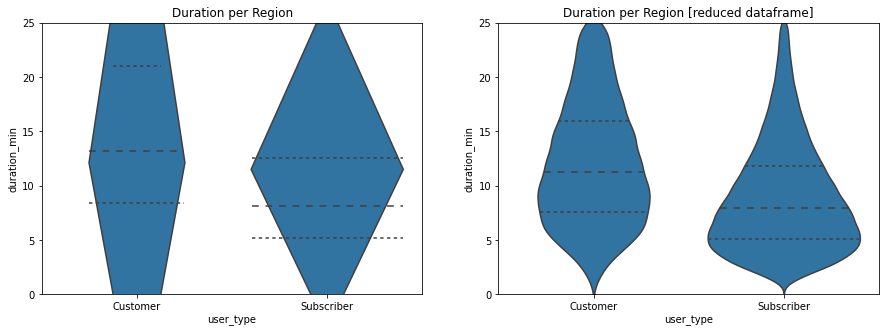

In [57]:
# Duration per User Type [violinplot, adjusted axes]

plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.ylim([0, 25])
plt.title('Duration per Region')
sb.violinplot(data=bike, x='user_type', y='duration_min', order = user_type_order, color = base_color, inner = 'quartile')

plt.subplot(1, 2, 2)
plt.ylim([0, 25])
plt.title('Duration per Region [reduced dataframe]')
sb.violinplot(data=bike_red, x='user_type', y='duration_min', order = user_type_order, color = base_color, inner = 'quartile');

Both plots show that subscribers do shorter rides that the customer.

The reduced and the full bike dataframes show comparable plots and results. Because of the removed high values, the violinplots show different shapes. Aditionally, box and violin plots show different quartiles and medians. A well chosen axes limitation supports readability. I decide to continue with the full bike dataframe instead of the reduced.

Next, I compare regions and user types against 'day of the week' and 'start hour'.

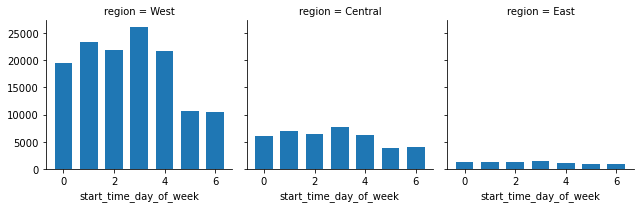

In [58]:
# Day of week against region

bins = np.arange(- 0.5, bike.start_time_day_of_week.max() + 1.5, 1)

g = sb.FacetGrid(data = bike, col = 'region', col_order = region_order)
g.map(plt.hist, "start_time_day_of_week", bins = bins, rwidth = 0.7);

West region shows the most rides. There is a huge difference between working day and weekend. Central region shows a lower number of rides. There is not such a huge difference beween working day and weekend. East region shows the lowest number of rides. There is no difference between working day and weekend noticeable.

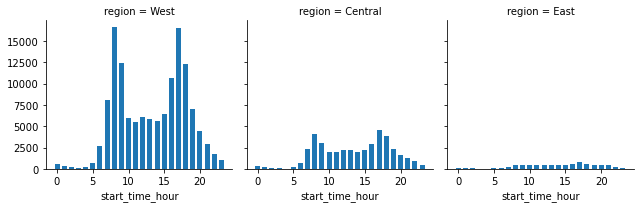

In [59]:
# Start time hour against region

bins = np.arange(- 0.5, bike.start_time_hour.max() + 1.5, 1)

g = sb.FacetGrid(data = bike, col = 'region', col_order = region_order)
g.map(plt.hist, "start_time_hour", bins = bins, rwidth = 0.7);

West and central region show a high number of rides in the morning between 6 and 9 a.m. and between 3 and 6 p.m. East region shows only a high number in the afternoon.

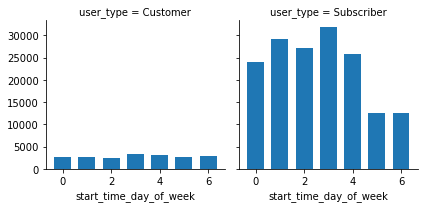

In [60]:
# Start time hour against user type

bins = np.arange(- 0.5, bike.start_time_day_of_week.max() + 1.5, 1)

g = sb.FacetGrid(data = bike, col = 'user_type', col_order = user_type_order)
g.map(plt.hist, "start_time_day_of_week", bins = bins, rwidth = 0.7);

Customers use the bike system constantly over all days of the week. Subscribers use it dramatically more on week days.

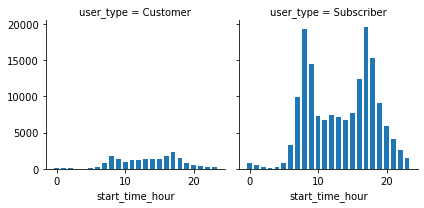

In [61]:
# Start time hour against against user type

bins = np.arange(- 0.5, bike.start_time_hour.max() + 1.5, 1)

g = sb.FacetGrid(data = bike, col = 'user_type', col_order = user_type_order)
g.map(plt.hist, "start_time_hour", bins = bins, rwidth = 0.7);

There is a higher number of rides in the morning and in the afternoon. The bike system is used more on day than on night by both user types.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Generally speaking rides depend on region and time. Subscribers seems to be people who use bikes for short trips to commute to work during working day. Customers use bikes for longer trips over the whole week. 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The stations are locally clustered into three main groups ('west', 'central' and 'east') along their geographical coordinates. 

## Multivariate Exploration

In this section I proceed my investigation on relationships between multiple features.

#### Geographical Coordinates

At first I combine geographical variables with the number of departures and the average duration per trip per station.

In [62]:
# creat datafram using groupby

df_bike_geo_temp = bike.groupby(['start_station_name', 'start_station_id', 'start_station_longitude', 'start_station_latitude'])['station_multi'].count().reset_index()

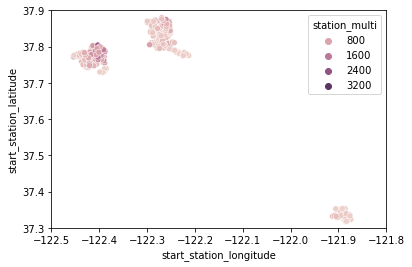

In [63]:
# number of departures per station

plt.xlim(-122.5, -121.8)
plt.ylim(37.3, 37.9)

sb.scatterplot(data = df_bike_geo_temp, x = 'start_station_longitude', y = 'start_station_latitude', hue = 'station_multi');

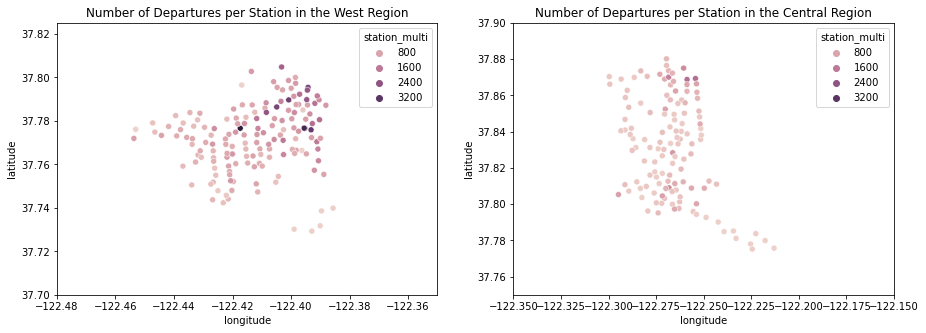

In [64]:
# number of departures per station

# set figure

plt.figure(figsize = [15, 5]) 

# subplot 1

plt.subplot(1, 2, 1)
plt.xlim(-122.48, -122.35)
plt.ylim(37.7, 37.825)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Number of Departures per Station in the West Region')
sb.scatterplot(data = df_bike_geo_temp, x = 'start_station_longitude', y = 'start_station_latitude', hue = 'station_multi');

# subplot 2

plt.subplot(1, 2, 2)
plt.xlim(-122.35, -122.15)
plt.ylim(37.75, 37.9)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Number of Departures per Station in the Central Region')
sb.scatterplot(data = df_bike_geo_temp, x = 'start_station_longitude', y = 'start_station_latitude', hue = 'station_multi');

As mentioned in the earlier investigation, there are the most departures in the west and central region. It looks that stations in the west region are orientated along streets. There is a line with highly used departure stations from centre to north east in the west region. There is no pattern noticeable in the central region.

In [65]:
# create datafram using groupby

df_bike_geo_dur_temp = bike.groupby(['start_station_name', 'start_station_id', 'start_station_longitude', 'start_station_latitude'])['duration_min'].mean().reset_index()

# df_bike_geo_dur_temp

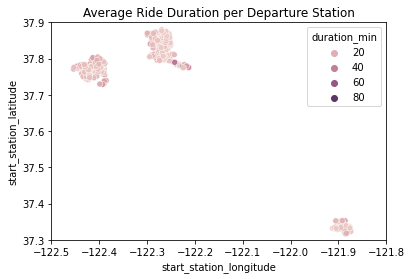

In [66]:
# average ride duration per departure station

plt.title('Average Ride Duration per Departure Station')
plt.xlim(-122.5, -121.8)
plt.ylim(37.3, 37.9)

sb.scatterplot(data = df_bike_geo_dur_temp, x = 'start_station_longitude', y = 'start_station_latitude', hue = 'duration_min');

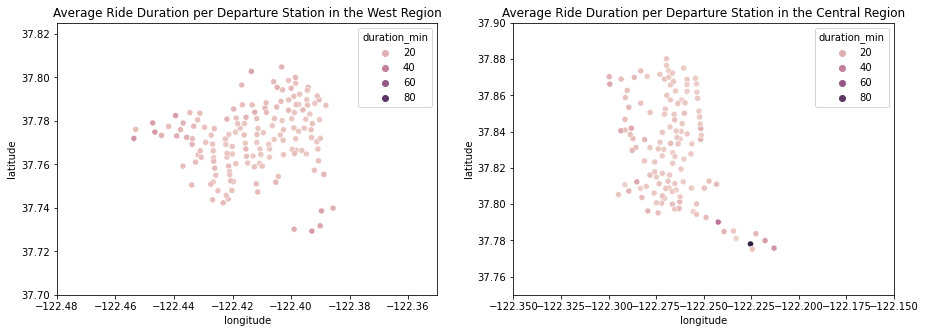

In [67]:
# Average Ride Duration per Departure Station in the West and Central Region

# set figure

plt.figure(figsize = [15, 5]) 

# subplot 1

plt.subplot(1, 2, 1)
plt.xlim(-122.48, -122.35)
plt.ylim(37.7, 37.825)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Average Ride Duration per Departure Station in the West Region')
sb.scatterplot(data = df_bike_geo_dur_temp, x = 'start_station_longitude', y = 'start_station_latitude', hue = 'duration_min');

# subplot 2

plt.subplot(1, 2, 2)
plt.xlim(-122.35, -122.15)
plt.ylim(37.75, 37.9)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Average Ride Duration per Departure Station in the Central Region')
sb.scatterplot(data = df_bike_geo_dur_temp, x = 'start_station_longitude', y = 'start_station_latitude', hue = 'duration_min');

Investigation of average duration time regarding stations offers no additional information. In the next steps I try to concentrate on duration time and the other categorical data 'region', 'user type', 'start hour' and 'day of week'.

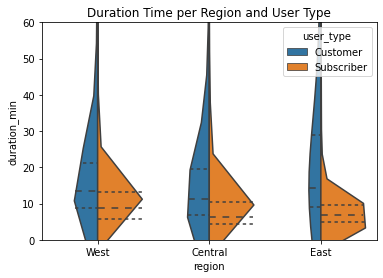

In [68]:
# Duration Time per Region and User Type

plt.xlabel('region')
plt.ylabel('duration_min')
plt.title('Duration Time per Region and User Type')
plt.ylim([0, 60])
sb.violinplot(data=bike, x='region', y='duration_min', hue= 'user_type', split = True, inner = 'quartile');

As mentioned earlier subscribers use the bike system most for short trips. Customers use the bike system for longer trips. In all regions the number of rides of subscribers are higher than of customers.

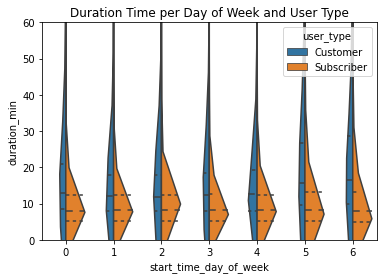

In [69]:
# Duration Time per Day of Week and User Type

plt.title('Duration Time per Day of Week and User Type')
plt.ylim([0, 60])
sb.violinplot(data=bike, x='start_time_day_of_week', y='duration_min', hue= 'user_type', split = True, inner = 'quartile');

One interesting thing regarding previous investigation. Duration per ride differs not in comparison between working day and weekend. 

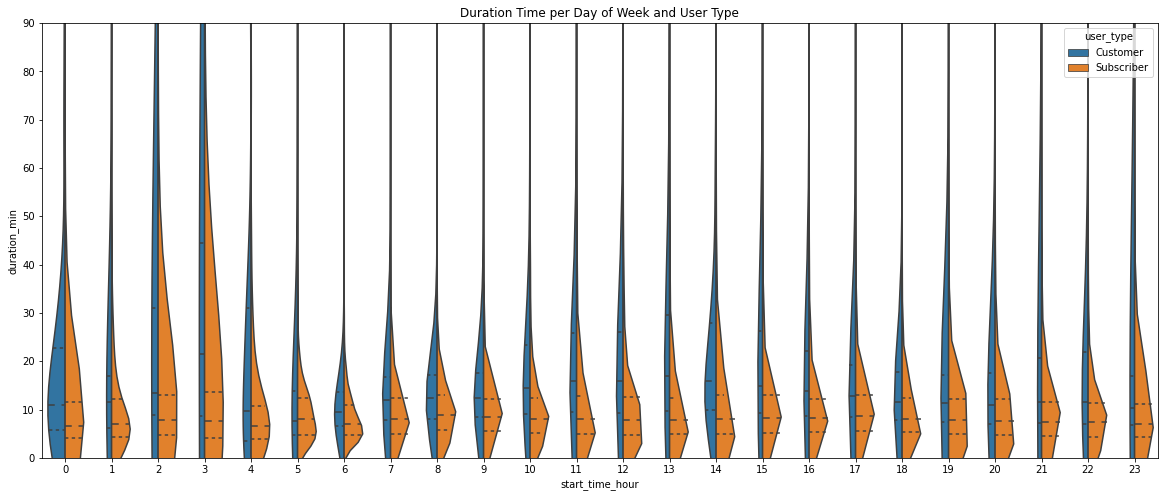

In [70]:
# Duration Time per Day of Week and User Type

plt.figure(figsize = [20,8])
plt.title('Duration Time per Day of Week and User Type')
plt.ylim([0, 90])
sb.violinplot(data=bike, x='start_time_hour', y='duration_min', hue= 'user_type', split = True, inner = 'quartile');

This plot supports my earlier results. Interesting are long rides beginning in the night hours between 11 p.m. and 3 a.m. My investigation offers no explaination for that.

Finally, I plot number of rides per region, user type, day of week and starting hour.

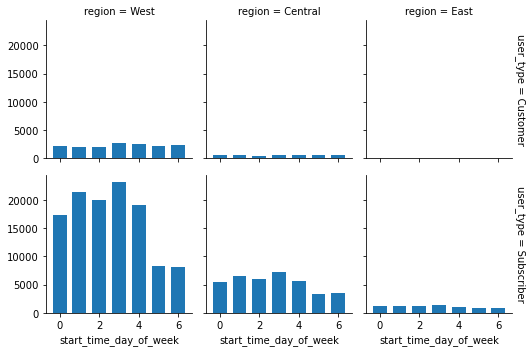

In [71]:
# Number of rides per region, user type and day of week

bins = np.arange(- 0.5, bike.start_time_day_of_week.max() + 1.5, 1)

g = sb.FacetGrid(data = bike, col = 'region', row = 'user_type', height = 2.5, margin_titles = True)
g.map(plt.hist, 'start_time_day_of_week', bins = bins, rwidth = 0.7);

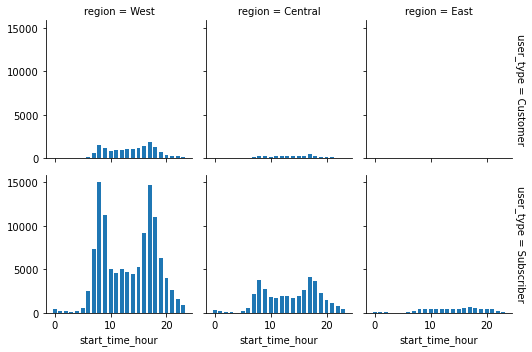

In [72]:
# Number of rides per region, user type and starting hour

bins = np.arange(- 0.5, bike.start_time_hour.max() + 1.5, 1)

g = sb.FacetGrid(data = bike, col = 'region', row = 'user_type', height = 2.5, margin_titles = True)
g.map(plt.hist, 'start_time_hour', bins = bins, rwidth = 0.7);

Thes plots summarize and support my earlier results. Most rides take place in the west region on working day in the morning and afternoon by subscribers. Rides by customers in general and the central and east region represent a minor part.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

This part of the investigation supported my first thoughts. Rides depend on region and user type. Furthermore they depend on starting hour and on the day. 

### Were there any interesting or surprising interactions between features?

During the investigation the geographical coodinates latitude and longitude become more interesting and explained more than expected first. There are rides in night between 11 p.m. and 3 a.m. with an unusual lenght, where my investigation offers no explanation so far.